In [1]:
import pandas as pd
from scipy.stats import wilcoxon

# Read the data from the file
data = pd.read_csv("data/utility.txt", sep="\t", header=None)

# Transpose the data
data_transposed = data.T

# Define the keys for the data
keys = [
    "Q1: Code Understanding",
    "Q2: Scaffold Intentions",
    "Q3: Ease of Specification",
    "Q4: No Unintended Effects",
    "Q5: Sense of Control",
    "Q6: Confidence in LLM Output",
    "Q7: Understanding LLM Decisions",
    "Q8: Satisfaction with Suggestions",
]

# Create df_summary with the first 8 rows and set the row names as keys
df_summary = data_transposed.iloc[:8]
df_summary.index = keys

# Create df_direct with the last 8 rows and set the row names as keys
df_direct = data_transposed.iloc[-8:]
df_direct.index = keys

# Perform Wilcoxon signed-rank test between df_summary and df_direct and calculate medians
wilcoxon_results = {}
for key in keys:
    stat, p_value = wilcoxon(df_summary.loc[key], df_direct.loc[key])
    median_summary = df_summary.loc[key].median()
    median_direct = df_direct.loc[key].median()
    wilcoxon_results[key] = {
        "statistic": stat,
        "p_value": round(p_value, 4),  # Round p-value to 4 decimal places
        "median_summary": median_summary,
        "median_direct": median_direct,
    }

# Print the results in a formatted manner
print("Wilcoxon Signed-Rank Test Results:")
for key, result in wilcoxon_results.items():
    print(
        f"{key} -> Mdn-S: {result['median_summary']}, Mdn-D: {result['median_direct']}, p: {result['p_value']}"
    )

Wilcoxon Signed-Rank Test Results:
Q1: Code Understanding -> Mdn-S: 6.0, Mdn-D: 4.0, p: 0.0044
Q2: Scaffold Intentions -> Mdn-S: 5.0, Mdn-D: 3.0, p: 0.015
Q3: Ease of Specification -> Mdn-S: 5.0, Mdn-D: 6.0, p: 0.0258
Q4: No Unintended Effects -> Mdn-S: 5.0, Mdn-D: 4.0, p: 0.5862
Q5: Sense of Control -> Mdn-S: 5.0, Mdn-D: 6.0, p: 0.8926
Q6: Confidence in LLM Output -> Mdn-S: 5.0, Mdn-D: 5.0, p: 0.9517
Q7: Understanding LLM Decisions -> Mdn-S: 5.0, Mdn-D: 5.0, p: 0.7127
Q8: Satisfaction with Suggestions -> Mdn-S: 6.0, Mdn-D: 6.0, p: 0.2568


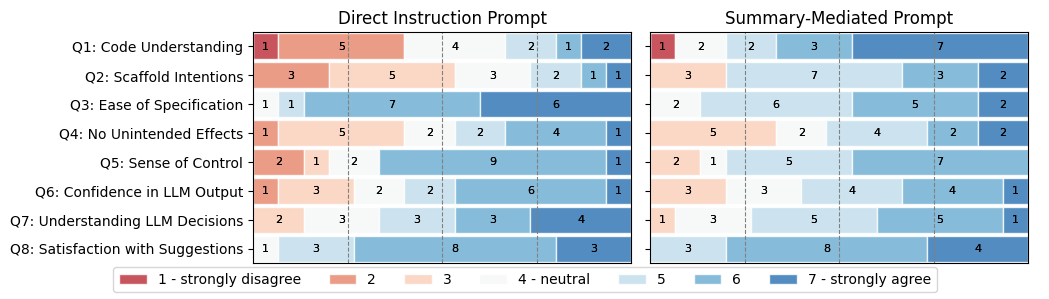

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set total number of responses per question
TOTAL_SAMPLES = 15

df_count_direct = pd.DataFrame(index=df_direct.index)
for i in range(1, 8):
    df_count_direct[i] = (df_direct == i).sum(axis=1)
df_count_direct.columns = [str(i) for i in range(1, 8)]
df_count_direct = df_count_direct[::-1]

df_count_summary = pd.DataFrame(index=df_summary.index)
for i in range(1, 8):
    df_count_summary[i] = (df_summary == i).sum(axis=1)
df_count_summary.columns = [str(i) for i in range(1, 8)]
df_count_summary = df_count_summary[::-1]

# Define Likert scale categories and colors
likert_labels = [
    "1 - strongly disagree",
    "2",
    "3",
    "4 - neutral",
    "5",
    "6",
    "7 - strongly agree",
]
colors = (
    sns.color_palette("RdBu", 7).as_hex()
)  # Ensure red = strongly disagree, blue = strongly agree, with lighter overall colors

# Create figure and axes
fig, axes = plt.subplots(
    1, 2, figsize=(10, 3), sharey=True, gridspec_kw={"wspace": 0.05}
)
bar_width = 0.9  # Reduce spacing between bars

# Plot Direct responses with white edge separation
df_count_direct.plot(
    kind="barh",
    stacked=True,
    color=colors,
    ax=axes[0],
    edgecolor="white",
    width=bar_width,
    legend=False,
    alpha=0.8,
)
axes[0].set_title("Direct Instruction Prompt")

# Plot Summary-Mediated responses with white edge separation
df_count_summary.plot(
    kind="barh",
    stacked=True,
    color=colors,
    ax=axes[1],
    edgecolor="white",
    width=bar_width,
    legend=False,
    alpha=0.8,
)
axes[1].set_title("Summary-Mediated Prompt")

# Common axis settings
for ax in axes:
    ax.set_xlabel("")  # Remove x-axis label
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticklabels(
        df_count_direct.index, rotation=0
    )  # Ensure correct question order
    ax.spines["top"].set_visible(True)
    ax.spines["right"].set_visible(True)
    ax.spines["left"].set_visible(True)
    ax.spines["bottom"].set_visible(True)
    ax.set_ylim(
        -0.5, len(df_count_direct) - 0.5
    )  # Align border with first and last question
    ax.yaxis.set_tick_params(direction="out")  # Ensure ticks point outward
    ax.set_xlim(0, TOTAL_SAMPLES)

    # Add vertical dashed lines for 25%, 50%, 75%
    for x in [TOTAL_SAMPLES * 0.25, TOTAL_SAMPLES * 0.5, TOTAL_SAMPLES * 0.75]:
        ax.axvline(x, color="gray", linestyle="dashed", linewidth=0.8)

    # Add participant counts inside bars
    for i, (_, row) in enumerate(df_count_direct.iterrows()):
        x_offset = 0
        for j, value in enumerate(row):
            if value > 0:
                axes[0].text(
                    x_offset + value / 2,
                    i,
                    str(int(value)),
                    va="center",
                    ha="center",
                    fontsize=8,
                    color="black",
                )
                x_offset += value

    for i, (_, row) in enumerate(df_count_summary.iterrows()):
        x_offset = 0
        for j, value in enumerate(row):
            if value > 0:
                axes[1].text(
                    x_offset + value / 2,
                    i,
                    str(int(value)),
                    va="center",
                    ha="center",
                    fontsize=8,
                    color="black",
                )
                x_offset += value

# Center the legend at the bottom of the entire figure
handles, labels = axes[0].get_legend_handles_labels()
fig.legend(
    handles,
    likert_labels,
    loc="lower center",
    ncol=7,
)

fig.savefig("figures/likert_plot.png", dpi=300, bbox_inches="tight")
plt.show()

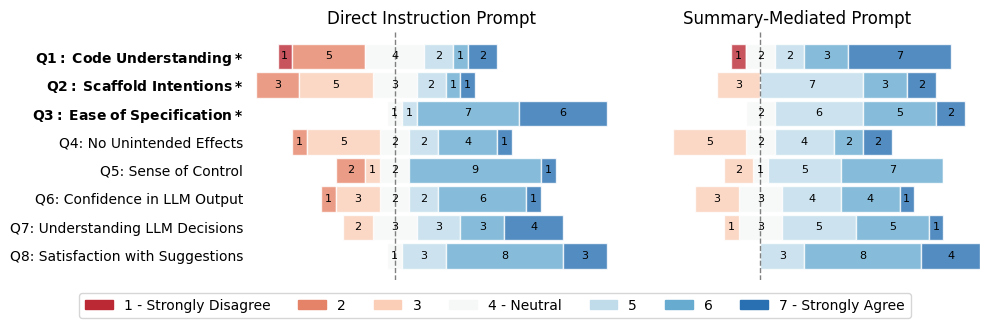

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Total responses
TOTAL_SAMPLES = 15

# Process Direct
df_count_direct = pd.DataFrame(index=df_direct.index)
for i in range(1, 8):
    df_count_direct[i] = (df_direct == i).sum(axis=1)
df_count_direct = df_count_direct[::-1]

# Process Summary-Mediated
df_count_summary = pd.DataFrame(index=df_summary.index)
for i in range(1, 8):
    df_count_summary[i] = (df_summary == i).sum(axis=1)
df_count_summary.columns = [str(i) for i in range(1, 8)]
df_count_summary = df_count_summary[::-1]

# Likert labels and colors
likert_labels = [
    "1 - Strongly Disagree",
    "2",
    "3",
    "4 - Neutral",
    "5",
    "6",
    "7 - Strongly Agree",
]
colors = sns.color_palette("RdBu", 7).as_hex()
color_map = {
    '1': colors[0],
    '2': colors[1],
    '3': colors[2],
    '4': colors[3],  # Neutral
    '5': colors[4],
    '6': colors[5],
    '7': colors[6],
}

# Prepare diverging data
def prepare_diverging(df):
    left = df.iloc[:, :3]  # 1-3
    neutral = df.iloc[:, 3]  # 4
    right = df.iloc[:, 4:]  # 5-7
    return left, neutral, right

direct_left, direct_neutral, direct_right = prepare_diverging(df_count_direct)
summary_left, summary_neutral, summary_right = prepare_diverging(df_count_summary)

fig, axes = plt.subplots(1, 2, figsize=(10, 3), sharey=True, gridspec_kw={"wspace": 0})

bar_width = 0.9

def plot_diverging(ax, left, neutral, right, title, index_labels, center_shift=0):
    y_pos = range(len(left))

    # Draw neutral bars (gray tone) first to get center position
    neutral_width = neutral
    neutral_start = -neutral_width/2
    ax.barh(y_pos, neutral_width, left=neutral_start, color=color_map['4'], edgecolor="white", height=bar_width, alpha=0.8)

    # Draw left (negative) bars
    left_cumsum = left.cumsum(axis=1)
    left_sum = left.sum(axis=1)
    for col in left.columns:
        widths = left[col]
        starts = neutral_start - left_sum + left_cumsum[col] - widths
        ax.barh(y_pos, widths, left=starts, color=color_map[str(int(col))], edgecolor="white", height=bar_width, alpha=0.8)

    # Draw right (positive) bars  
    right_cumsum = right.cumsum(axis=1)
    for i, col in enumerate(right.columns):
        widths = right[col]
        starts = neutral_start + neutral_width + right_cumsum[col] - widths
        ax.barh(y_pos, widths, left=starts, color=color_map[str(int(col))], edgecolor="white", height=bar_width, alpha=0.8)

    # Add counts inside bars
    for i, (neg_row, neu_value, pos_row) in enumerate(zip(left.values, neutral.values, right.values)):
        # === Left side ===
        x_offset = (neutral_start - left_sum).iloc[i]
        for count in neg_row:
            if count > 0:
                ax.text(x_offset + count / 2, i, str(int(count)), va="center", ha="center", fontsize=8, color="black")
            x_offset += count

        # === Neutral ===
        if neu_value > 0:
            ax.text(0, i, str(int(neu_value)), va="center", ha="center", fontsize=8, color="black")

        # === Right side ===
        x_offset = (neutral_start + neutral_width).iloc[i]
        for count in pos_row:
            if count > 0:
                ax.text(x_offset + count / 2, i, str(int(count)), va="center", ha="center", fontsize=8, color="black")
            x_offset += count

    # Settings
    ax.set_title(title)
    ax.set_xlabel("")
    ax.set_xticks([])
    ax.set_xlim(-TOTAL_SAMPLES * 2 / 3, TOTAL_SAMPLES)
    
    # Modify y-axis labels to append * and make first three bold
    modified_labels = []
    for i, label in enumerate(index_labels[::-1]):
        if i < 3:  # First three labels
            modified_labels.append(r"$\mathbf{" + label.replace(" ", "\ ") + "*" + "}$")
        else:
            modified_labels.append(label)
    modified_labels = modified_labels[::-1]
    ax.set_yticks(range(len(modified_labels)), labels=modified_labels)
    ax.tick_params(axis='y', length=0)

    # Remove spines
    for spine in ax.spines.values():
        spine.set_visible(False)

    # Draw center line as gray
    ax.axvline(0, color="gray", linewidth=1, linestyle='--')


plot_diverging(axes[0], direct_left, direct_neutral, direct_right, "Direct Instruction Prompt", df_count_direct.index)
plot_diverging(axes[1], summary_left, summary_neutral, summary_right, "Summary-Mediated Prompt", df_count_summary.index)

# Add legend at the bottom
handles = [plt.Rectangle((0, 0), 1, 1, color=color_map[str(i)]) for i in range(1,8)]
fig.legend(handles, likert_labels, loc="lower center", ncol=7, bbox_to_anchor=(0.5, -0.1))

plt.tight_layout()
fig.savefig("figures/likert_plot_diverging_fixed.pdf", bbox_inches="tight")
plt.show()
